In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
# check duplicates
df.shape, df.drop_duplicates().shape, df.round(4).drop_duplicates().shape

((90000, 54), (90000, 54), (90000, 54))

In [5]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [6]:
# first glaze on the distributions. The mean and 50% are pretty close so distributions looks symmetrical. 
# min, max and 50% shows there are no outliers and long tails. Looks like it's very pleased data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


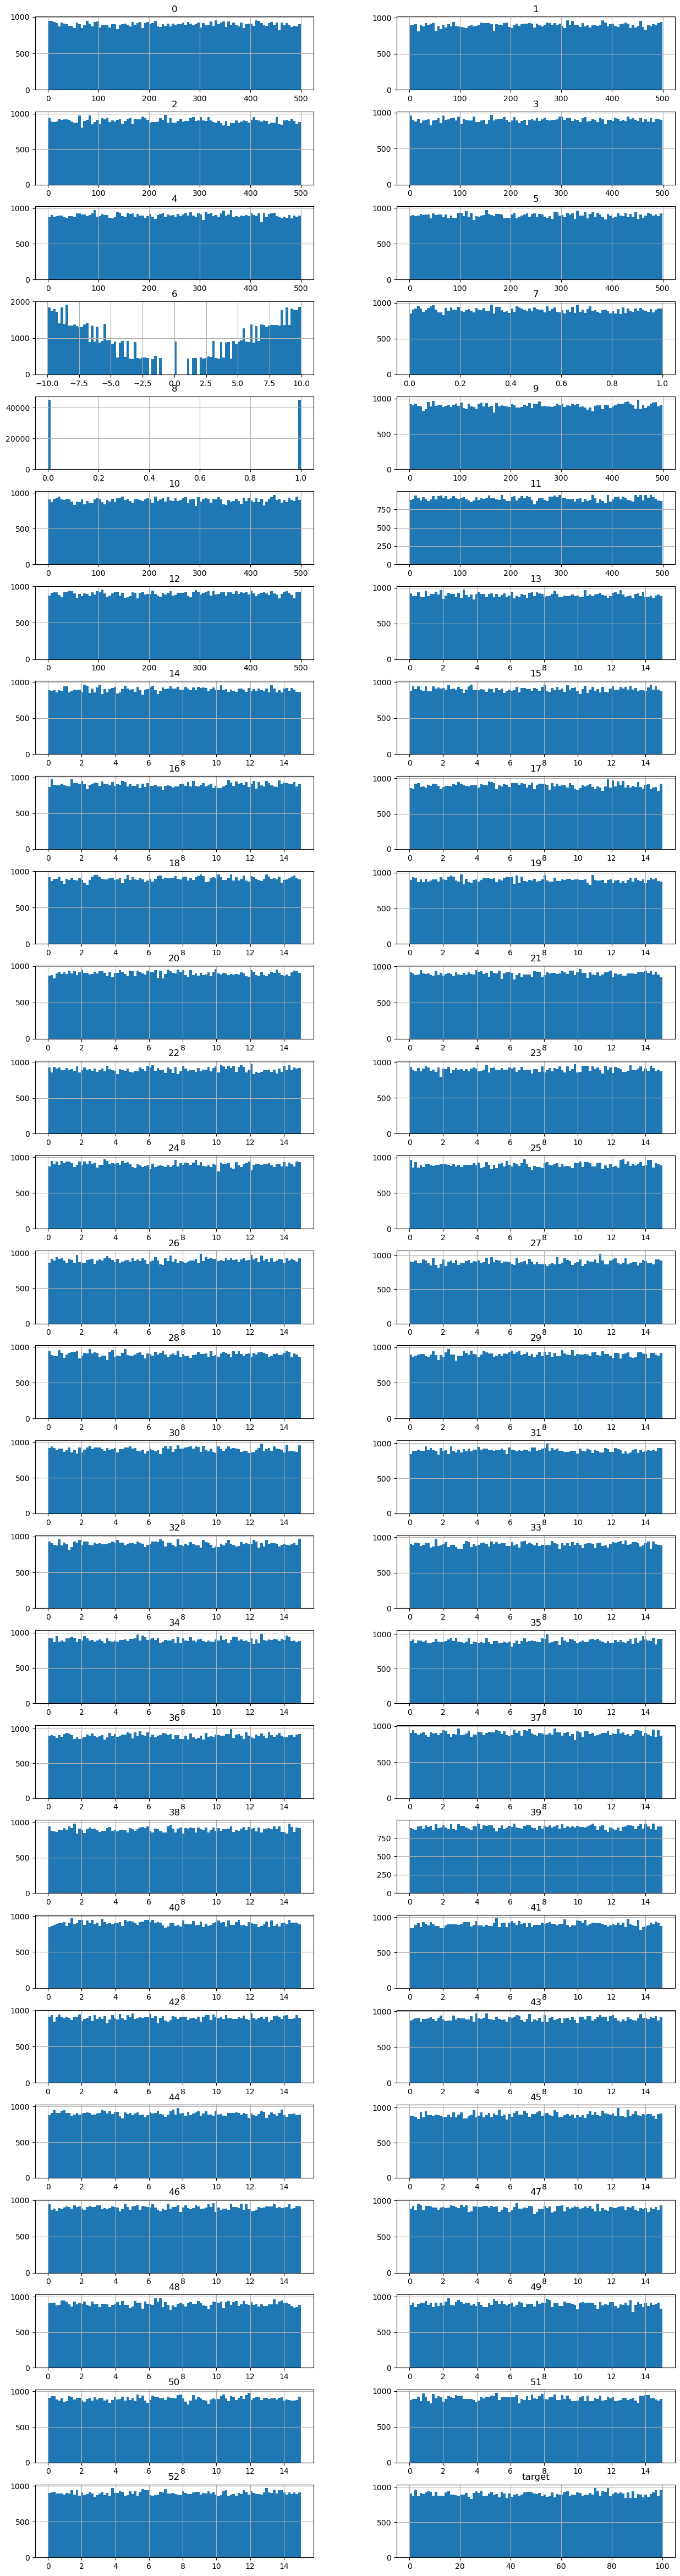

In [7]:
# let's look at the distributions with our own eyes
# let's sure that int types columns are not miscasted categorical 
# (it's likely true  because of big amount of unique values) 
fig, ax = plt.subplots(27, 2, figsize=(15, 60))

m=0
for i in range(27):
    for j in range(2):
        df.hist(column=df.columns[m], 
                bins=100, ax=ax[i,j])
        m+=1

<Axes: >

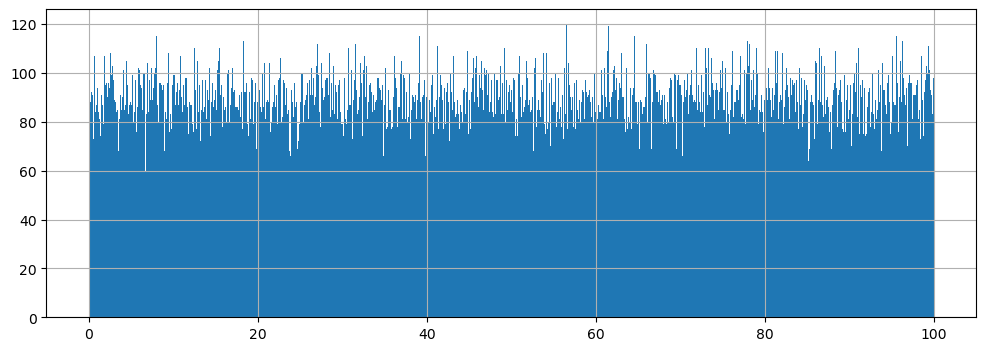

In [8]:
# and closely at one of them
df['target'].hist(bins=1000, figsize=(12, 4))

In [11]:
# since the distributions are very similar, let's check if the data in the columns is duplicated
# no, they are pretty independent
corr = stats.spearmanr(df.values)
corr.correlation.round(1)
for i, row in enumerate(corr.correlation):
    cor_ind = np.argwhere(abs(row)>0.5)
    cor_ind = cor_ind[cor_ind != i]
    if cor_ind.size > 0:
        print(f"corr for feature {i}: ", cor_ind) 

corr for feature 6:  [8]
corr for feature 8:  [6]


In [12]:
# let's split the data and train some baseline model
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], 
    test_size=0.20, random_state=42)

In [15]:
# since we have data without missings and with the good distributions,
# let's start with the linear model
scaler = StandardScaler()
train_cols =["x"+str(i) for i in range(x_train.shape[1])]
x_train_lm = pd.DataFrame(scaler.fit_transform(x_train), 
                          columns=train_cols)
x_test_lm = pd.DataFrame(scaler.transform(x_test),
                         columns=train_cols)

In [16]:
# baseline
lm = LinearRegression()
lm.fit(x_train_lm.values, y_train)
lm_pred = lm.predict(x_test_lm.values)
mean_squared_error(y_test, lm_pred, squared=False)

29.015412891101402

In [17]:
# reasonable baseline
# so there is some non-linear relation
gb = GradientBoostingRegressor()
gb.fit(x_train.values, y_train)
gb_pred = gb.predict(x_test.values)
mean_squared_error(y_test, gb_pred, squared=False)

0.41675898614161727

In [18]:
# let's check feature importances
# one feature!
coefs = pd.DataFrame({"feature": x_train.columns, 
                      "lm_weight": abs(lm.coef_), 
                      "gb_weight": gb.feature_importances_})
coefs.sort_values('gb_weight', ascending=False).head(10).round(4)

,feature,lm_weight,gb_weight
6,6,0.0970,0.9999
7,7,0.3120,0.0001
26,26,0.1495,0.0000
47,47,0.0199,0.0000
40,40,0.3004,0.0000
30,30,0.0444,0.0000
31,31,0.0418,0.0000
32,32,0.0155,0.0000
33,33,0.0365,0.0000
34,34,0.0370,0.0000


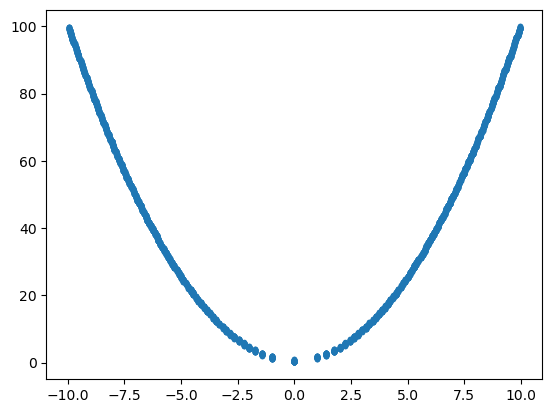

In [19]:
# plot
samp = df.sample(5000)
plt.scatter(samp['6'], samp['target'], marker='.')

In [20]:
# try to interpolate
A, B, C = np.polyfit(df['6'].values,
                     df['target'].values, 2)
print(f"{A.round(4)}*x^2 + {B.round(4)}*x + {C.round(4)}")

1.0*x^2 + -0.0001*x + 0.4975


In [21]:
# round a little bit
# even better than unfitted XGBoost
mean_squared_error(df['target'], df['6']**2 + 0.5, squared=False)

0.2886844530828437

In [22]:
# regarding the simplicity and the fact that this is most likely artificial data, 
# it is unlikely that it will be possible to do better. 
# but I'll try to teach a more complex XGBoost with both valuable features, just in case
gb = GradientBoostingRegressor(n_estimators=200, max_depth=5)
gb.fit(x_train[["6", "7"]].values, y_train)
gb_pred = gb.predict(x_test[["6", "7"]].values)
mean_squared_error(y_test, gb_pred, squared=False)

0.02626550340154495

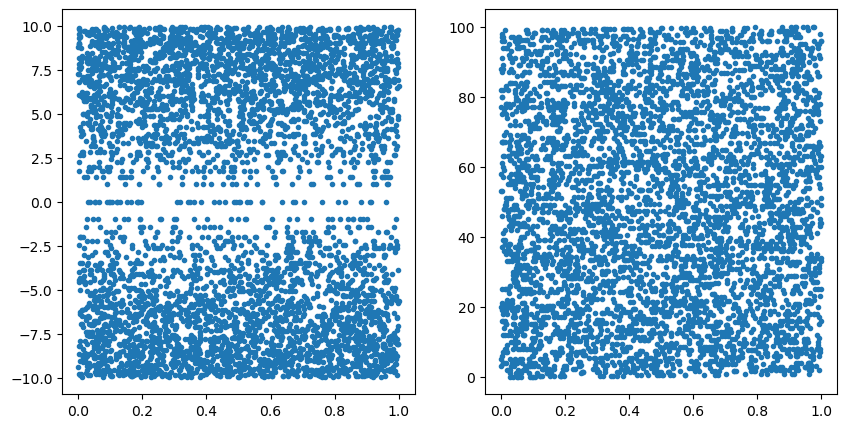

In [23]:
# unfortunately, it works so we must to move forward
# there are no obvious relations for feature "7" yet
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(samp['7'], samp['6'], marker='.')
ax2.scatter(samp['7'], samp['target'], marker='.')

In [30]:
# let's try to find this relationship quantitatively
# to be sure, we will use cross-validation
# here is the desired pattern!
poly = PolynomialFeatures(degree=2)
lm_pn = LinearRegression()
pipeline = make_pipeline(poly, lm_pn)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(pipeline, df[["6", "7"]].values, 
                         df["target"].values, cv=cv, 
                         scoring='neg_root_mean_squared_error')
scores * -1

array([4.93838080e-14, 4.08368195e-14, 3.26687060e-14, 4.23133524e-14,
       2.58249456e-14])

In [36]:
# once again for the weights
lm_pn = LinearRegression()
lm_pn.fit(poly.fit_transform(x_train[["6", "7"]]), y_train)

LinearRegression()

In [43]:
# can we simplify calculations with dropped off unused features
C, A, B, Asq, AB, Bsq = lm_pn.coef_
print(f"{C} + {A.round(4)}x + {B.round(4)}y + {Asq.round(4)}x^2 + {AB.round(4)}xy + {Bsq.round(4)}y^2")

0.0 + -0.0x + 1.0y + 1.0x^2 + -0.0xy + 0.0y^2


In [44]:
# yes, we can
mean_squared_error(df['target'], 
                   df['7'] + df['6']**2, 
                   squared=False)

9.687150056212742e-15